In [33]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random

from sklearn.decomposition import PCA

MODEL_FILE = 'olive_model_params.npz'
DATA_FILE = 'olive_data.npz'

In [2]:
def sigmoid(z):
    """
    Sigmoid function to map any real value into the (0, 1) interval.
    
    :param z: Input value or array.
    """

    return 1 / (1 + np.exp(-z))

In [3]:
def initialize_parameters(dim: int):
    """
    Docstring for initialize_parameters
    
    :param dim: Description
    :type dim: int
    """

    w = np.zeros((dim, 1))
    b = 0.0

    return w, b


In [4]:
def propagate(w: np.ndarray, b: float, X: np.ndarray, Y: np.ndarray):
    """
    Docstring for propogate
    
    :param w: Description
    :type w: np.ndarray
    :param b: Description
    :type b: float
    :param X: Description
    :type X: np.ndarray
    :param y: Description
    :type y: np.ndarray
    """

    n = Y.shape[0] # 2000 samples

    # 1. Forward Propogation
    Y_hat = sigmoid(np.dot(X, w) + b)

    # 2. Compute cost
    cost = (-1/n) * np.sum(Y * np.log(Y_hat) + (1-Y) * np.log(1-Y_hat))

    residuals = Y_hat - Y
    XTransposed = np.transpose(X)

    dw = (1/n) * (np.dot(XTransposed, residuals))
    db = (1/n) * np.sum(residuals)

    return Y_hat, cost, dw, db 


In [5]:
def optimize(w: np.ndarray, b: float, X: np.ndarray, Y: np.ndarray, num_iterations: int, learning_rate: float):
  costs = []

  for i in range(num_iterations):
    # 1. Calculate gradient and cost
    Y_hat, cost, dw, db = propagate(w, b, X, Y)

    # 2. Update parameters (Learning)
    w = w - learning_rate * dw
    b = b - learning_rate * db

    if i % 100 == 0:
      costs.append(cost)
      print(f"Cost after iteration {i}: {cost}")

  return w, b, costs


In [6]:
def predict(w: np.ndarray, b: float, X: np.ndarray):
  """
  Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
  """

  Y_hat = sigmoid(np.dot(X, w) + b)

  Y_prediction = (Y_hat > 0.5).astype(int)

  return Y_prediction
  

In [7]:
def train_model(x_train: np.ndarray, y_train: np.ndarray, learning_rate, num_iterations: int):
  """
  Trains the logistic regression model and prints the training accuracy.
  """

  w, b = initialize_parameters(dim=x_train.shape[1])
  w, b, costs = optimize(w, b, x_train, y_train, num_iterations=num_iterations, learning_rate=learning_rate)

  np.savez(MODEL_FILE, w=w, b=b)
  print(f"Model saved to {MODEL_FILE}")

  predictions = predict(w, b, x_train)
  print(f"Train accuracy: {100 - np.mean(np.abs(predictions - y_train)) * 100}")

  return w, b, costs

In [8]:

def train_or_load_model(X: np.ndarray, y: np.ndarray, learning_rate: float = 0.005, num_iterations: int = 2000):
    # Check if the model is stored
    if os.path.exists(MODEL_FILE):
        print("Loading model parameters from file.")
        data = np.load(MODEL_FILE)
        w = data['w']
        b = data['b']
        return w, b, []
    
    else:
        print("No saved model found. Starting training (this might take a while)...")

        return train_model(X, y, learning_rate, num_iterations)

In [9]:
def evaluate_model(w: np.ndarray, b: float, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray):
    train_predictions = predict(w, b, X_train)
    train_accuracy = 100 - np.mean(np.abs(train_predictions - y_train)) * 100

    test_predictions = predict(w, b, X_test)
    test_accuracy = 100 - np.mean(np.abs(test_predictions - y_test)) * 100

    print(f"Train accuracy: {train_accuracy:.2f} %")
    print(f"Test accuracy: {test_accuracy:.2f} %")

In [10]:
def plot_learning_curve(costs):
    costs = np.squeeze(costs)

    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title('Learning rate =' + str(0.005))
    plt.show()

Loaded X shape: (1600, 26756)
Loaded y shape: (1600, 1)
No saved model found. Starting training (this might take a while)...
Cost after iteration 0: 0.6931471805599452
Cost after iteration 100: 0.5451200337146966
Cost after iteration 200: 0.4850450748314873
Cost after iteration 300: 0.4455377067082532
Cost after iteration 400: 0.41625833413404834
Cost after iteration 500: 0.39302730242091094
Cost after iteration 600: 0.37379823530825385
Cost after iteration 700: 0.3574209595136621
Cost after iteration 800: 0.3431814411516575
Cost after iteration 900: 0.33060369964112724
Cost after iteration 1000: 0.3193536520186946
Cost after iteration 1100: 0.3091876149320953
Cost after iteration 1200: 0.2999224664497279
Cost after iteration 1300: 0.29141725710724714
Cost after iteration 1400: 0.28356131742707186
Cost after iteration 1500: 0.2762662686065199
Cost after iteration 1600: 0.2694604882569064
Cost after iteration 1700: 0.2630851784739469
Cost after iteration 1800: 0.25709151183045753
Cost a

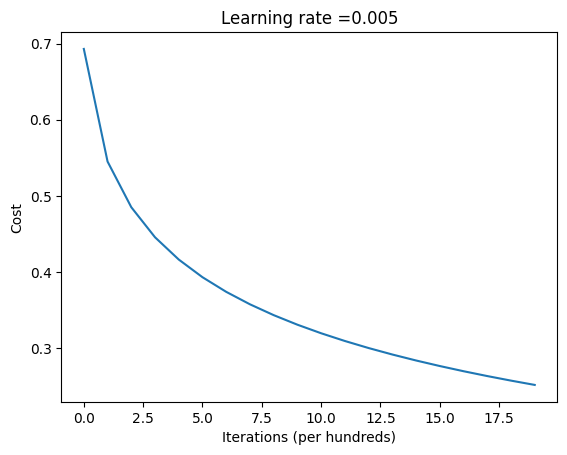

Train accuracy: 92.44 %
Test accuracy: 84.50 %


In [160]:
data = np.load(DATA_FILE)

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f"Loaded X shape: {X_train.shape}")
print(f"Loaded y shape: {y_train.shape}")

w, b, costs = train_or_load_model(X_train, y_train, learning_rate=0.01, num_iterations=2000)
plot_learning_curve(costs)

evaluate_model(w, b, X_train, y_train, X_test, y_test)

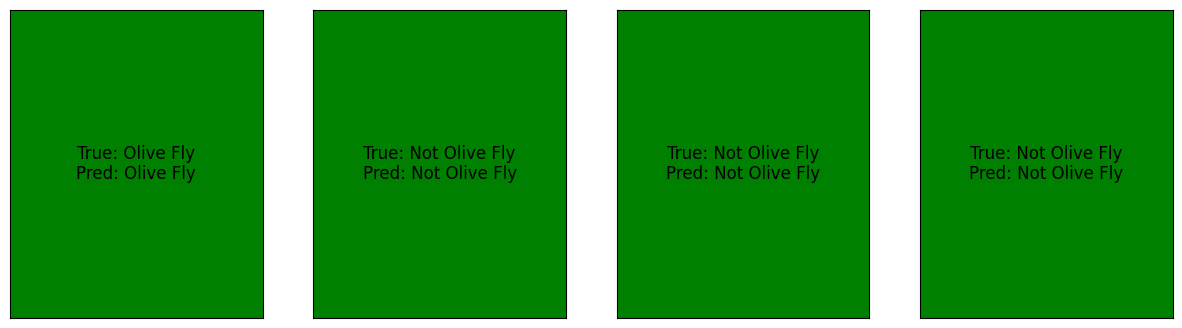

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

for ax in axes:
    idx = random.randint(0, X_test.shape[0] - 1)
    x_sample = X_test[idx].reshape(1, -1)
    true_label = y_test[idx, 0]

    predicted_label = predict(w, b, x_sample)[0, 0]

    label_name = "Olive Fly" if predicted_label == 1 else "Not Olive Fly"
    pred_name = "Olive Fly" if true_label == 1 else "Not Olive Fly"

    # Since we only have features (X), we can't show the original image easily 
    # unless we saved it, so we just show the text result.
    ax.text(0.5, 0.5, f"True: {label_name}\nPred: {pred_name}", 
            fontsize=12, ha='center', va='center')
    
    color = 'green' if true_label == predicted_label else 'red'
    ax.set_facecolor(color)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
